# Recommender System for Board Games from [BoardGameGeek.com](https://boardgamegeek.com/)



1.   Iatrou Manos
2.   Papageorgiou Vasileios
3. Sykianakis Xaralambos




# Dataset Description



*   Games File
*   User Ratings File
*   Mechanics File
*   Themes File



In [1]:
!pip install tomotopy
import pandas as pd
import numpy as np
import tomotopy as tp
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = Path('/content/drive/MyDrive/Colab Notebooks/Advanced Customer Analytics/Interpretable Predictions/Recommender_Files')

In [4]:
csv_files = list(folder_path.glob('*.csv'))

In [5]:
dataframes = {}
for file in csv_files:
    filename = file.stem
    dataframes[filename] = pd.read_csv(file)

In [6]:
print(dataframes.keys())

dict_keys(['games', 'user_ratings', 'mechanics', 'themes'])


In [7]:
dataframes["games"].columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'AvgRating', 'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned',
       'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens'],
      dtype='object')

In [8]:
# Keep only relevant columns

columns_to_keep = ['BGGId', 'YearPublished', 'GameWeight', 'LanguageEase',
                   'MfgPlaytime', 'MfgAgeRec', 'NumAlternates', 'NumExpansions',
                   'NumImplementations', 'Kickstarted', 'Cat:Thematic',
                   'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS',
                   'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']

In [9]:
df = dataframes['games'].loc[:,columns_to_keep]

games_df = df[(df['YearPublished'] > 1960) & (df['GameWeight'] > 0)]

In [10]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20948 entries, 0 to 21923
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BGGId               20948 non-null  int64  
 1   YearPublished       20948 non-null  int64  
 2   GameWeight          20948 non-null  float64
 3   LanguageEase        15591 non-null  float64
 4   MfgPlaytime         20948 non-null  int64  
 5   MfgAgeRec           20948 non-null  int64  
 6   NumAlternates       20948 non-null  int64  
 7   NumExpansions       20948 non-null  int64  
 8   NumImplementations  20948 non-null  int64  
 9   Kickstarted         20948 non-null  int64  
 10  Cat:Thematic        20948 non-null  int64  
 11  Cat:Strategy        20948 non-null  int64  
 12  Cat:War             20948 non-null  int64  
 13  Cat:Family          20948 non-null  int64  
 14  Cat:CGS             20948 non-null  int64  
 15  Cat:Abstract        20948 non-null  int64  
 16  Cat:

In [11]:
dataframes["mechanics"].columns

Index(['BGGId', 'Alliances', 'Area Majority / Influence', 'Auction/Bidding',
       'Dice Rolling', 'Hand Management', 'Simultaneous Action Selection',
       'Trick-taking', 'Hexagon Grid', 'Once-Per-Game Abilities',
       ...
       'Contracts', 'Passed Action Token', 'King of the Hill',
       'Action Retrieval', 'Force Commitment', 'Rondel',
       'Automatic Resource Growth', 'Legacy Game', 'Dexterity', 'Physical'],
      dtype='object', length=158)

In [12]:
dataframes["themes"].columns

Index(['BGGId', 'Adventure', 'Fantasy', 'Fighting', 'Environmental', 'Medical',
       'Economic', 'Industry / Manufacturing', 'Transportation',
       'Science Fiction',
       ...
       'Theme_Fashion', 'Theme_Geocaching', 'Theme_Ecology', 'Theme_Chernobyl',
       'Theme_Photography', 'Theme_French Foreign Legion',
       'Theme_Cruise ships', 'Theme_Apache Tribes', 'Theme_Rivers',
       'Theme_Flags identification'],
      dtype='object', length=218)

In [13]:
# Left join games and mechanics on 'BGGId'
games_themes_df = pd.merge(games_df, dataframes["themes"], on='BGGId', how='left')

# Left join the result with themes on 'BGGId'
games_full = pd.merge(games_themes_df, dataframes["mechanics"], on='BGGId', how='left')

# Display dataframe columns
games_full.columns

Index(['BGGId', 'YearPublished', 'GameWeight', 'LanguageEase', 'MfgPlaytime',
       'MfgAgeRec', 'NumAlternates', 'NumExpansions', 'NumImplementations',
       'Kickstarted',
       ...
       'Contracts', 'Passed Action Token', 'King of the Hill',
       'Action Retrieval', 'Force Commitment', 'Rondel',
       'Automatic Resource Growth', 'Legacy Game', 'Dexterity', 'Physical'],
      dtype='object', length=392)

In [18]:
games_full.loc[:,games_df.columns].describe()

,BGGId,YearPublished,GameWeight,LanguageEase,MfgPlaytime,MfgAgeRec,NumAlternates,NumExpansions,NumImplementations,Kickstarted,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,20948.000000,20948.000000,20948.000000,15591.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000,20948.000000
mean,117460.550076,2007.395074,2.035858,217.155564,92.618484,9.686271,1.311151,1.426294,0.308717,0.156196,0.058239,0.110178,0.167462,0.106884,0.014417,0.047785,0.029597,0.038763
std,104113.241838,12.342796,0.802589,235.832525,540.605606,3.609661,6.578013,7.862423,0.820401,0.363050,0.234201,0.313118,0.373397,0.308973,0.119204,0.213316,0.169477,0.193033
min,1.000000,1961.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12454.500000,2002.000000,1.344800,25.000000,30.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106952.000000,2011.000000,2.000000,141.000000,45.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,205156.500000,2017.000000,2.561300,352.937500,90.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349131.000000,2021.000000,5.000000,1757.000000,60000.000000,25.000000,850.000000,525.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dataframes['user_ratings']

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP
...,...,...,...
18942210,165521,3.0,rseater
18942211,165521,3.0,Bluefox86
18942212,165521,3.0,serginator
18942213,193488,1.0,CaptainCattan


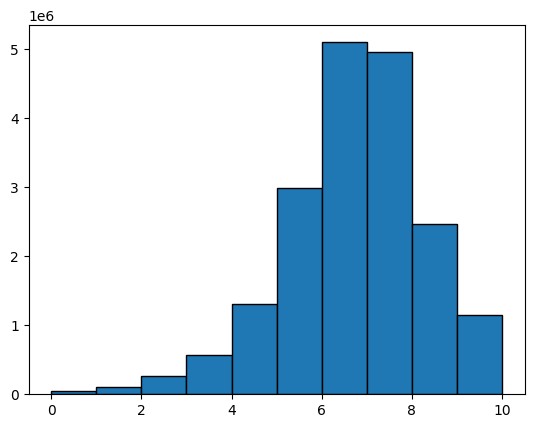

In [16]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(dataframes['user_ratings']['Rating'], bins=10, edgecolor='black');

In [17]:
print("rows x columns", np.shape(games_df))
print()
games_df.info()

rows x columns (20948, 18)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20948 entries, 0 to 21923
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BGGId               20948 non-null  int64  
 1   YearPublished       20948 non-null  int64  
 2   GameWeight          20948 non-null  float64
 3   LanguageEase        15591 non-null  float64
 4   MfgPlaytime         20948 non-null  int64  
 5   MfgAgeRec           20948 non-null  int64  
 6   NumAlternates       20948 non-null  int64  
 7   NumExpansions       20948 non-null  int64  
 8   NumImplementations  20948 non-null  int64  
 9   Kickstarted         20948 non-null  int64  
 10  Cat:Thematic        20948 non-null  int64  
 11  Cat:Strategy        20948 non-null  int64  
 12  Cat:War             20948 non-null  int64  
 13  Cat:Family          20948 non-null  int64  
 14  Cat:CGS             20948 non-null  int64  
 15  Cat:Abstract        20948